In [23]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load dataset

In [45]:
mnist=load_digits()
type(mnist)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [46]:
X=pd.DataFrame(mnist.data)
Y=pd.DataFrame(mnist.target)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


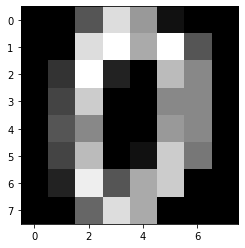

In [47]:
plt.imshow(mnist.images[0],cmap='gray')

In [48]:
X.shape

(1797, 64)

In [49]:
mean=np.mean(X,axis=0)
std=np.std(X,axis=0)
x=X-mean
#x/=std

## Covariance matrix
So what we do is we take the covariance of every variable with every variable (including itself) and make a matrix out of it.  Along the diagonal will be the variance of each variable (except for that $N-1$ in the denominator), and the rest of the matrix will be the covariances.  Note that since the order of the variables doesn't matter when computing covariance, the matrix will be *symmetric* (i.e. it will equal its own transpose, i.e. will have a reflection symmetry across the diagonal) and thus will be a *square* matrix. 

Numpy gives us a handy thing to call:

Finding COvariance Matrix

In [50]:
S = np.cov(x.T)   # .T b/c numpy wants varibles along rows rather than down columns?
print("covariance matrix shape = ",S.shape)

covariance matrix shape =  (64, 64)


Finding EigenValues and EigenVectors

In [51]:
def sorted_eig(A):  # For now we sort 'by convention'. For PCA the sorting is key. 
    lambdas, vs = np.linalg.eig(A)
    # Next line just sorts values & vectors together in order of decreasing eigenvalues
    lambdas, vs = zip(*sorted(zip(list(lambdas), list(vs.T)),key=lambda x: x[0], reverse=True))
    return lambdas, np.array(vs).T  # un-doing the list-casting from the previous line

lambdas, vs = sorted_eig(S)
len(lambdas) # hold off on printing out the eigenvectors until we do the next part!

64

Variance and #of components

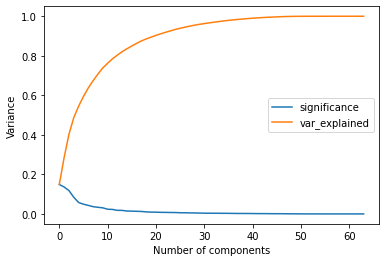

In [52]:
variance_retained=np.cumsum(np.abs(lambdas)/np.sum(lambdas))
plt.plot(np.abs(lambdas)/np.sum(lambdas),label='significance')
plt.xlabel('Number of components')
plt.ylabel('Variance') 

plt.plot(variance_retained,label='var_explained')
plt.legend()
plt.show()

Compress the image

In [58]:
vs=vs.T
lambdas,vs=lambdas[0:40],vs[0:40]
compress_x=np.dot(X,vs.T)
compress_x.shape

(1797, 40)

Reconstruct Image

In [60]:
recon=np.dot(compress_x,vs)
recon_img_mat = np.absolute(recon)
recon_img_mat.shape

(1797, 64)

Text(0.5, 1.0, 'original image')

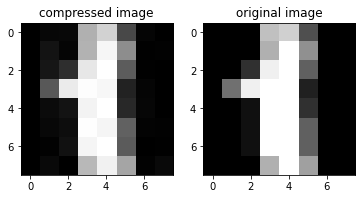

In [104]:
index=1
plt.subplot(1,2,1)
plt.title('compressed image')
plt.imshow(recon_img_mat[index].T.reshape(8,8),cmap='gray')
plt.subplot(1,2,2)
plt.imshow(X.iloc[index].values.reshape(8,8),cmap='gray')
plt.title('original image')

# **USING SKLEARN PCA METHOD**

Text(0, 0.5, 'Explained variance')

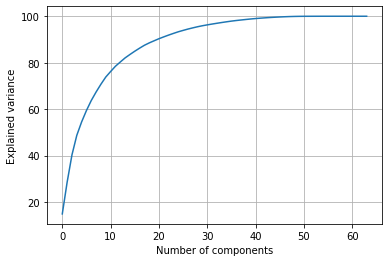

In [71]:
import numpy as np
from sklearn.decomposition import PCA

pca_64 = PCA(n_components=64)
pca_64.fit(X)

plt.grid()
plt.plot(np.cumsum(pca_64.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Top 10 component retained here

In [ ]:
pca_10 = PCA(n_components=10)
mnist_pca_10_reduced = pca_10.fit_transform(X)
mnist_pca_10_recovered = pca_10.inverse_transform(mnist_pca_10_reduced)

print('Total Explained Variance in this 10 principal component : ',np.cumsum(pca_10.explained_variance_ratio_ * 100)[-1])


image_pca_10 = mnist_pca_10_recovered[1,:].reshape([8,8])
plt.figure(figsize=(30,30))
plt.subplot(1,2,1)
plt.imshow(image_pca_10, cmap='gray')
plt.title('Compressed image with 10 components', fontsize=15, pad=15)
plt.subplot(1,2,2)
plt.imshow(x.iloc[1].values.reshape(8,8), cmap='gray')
plt.title('Original image', fontsize=15, pad=15)

Top 40 component retained here

Total Explained Variance in this 40 principal component :  98.82027336000799


Text(0.5, 1.0, 'Original image')

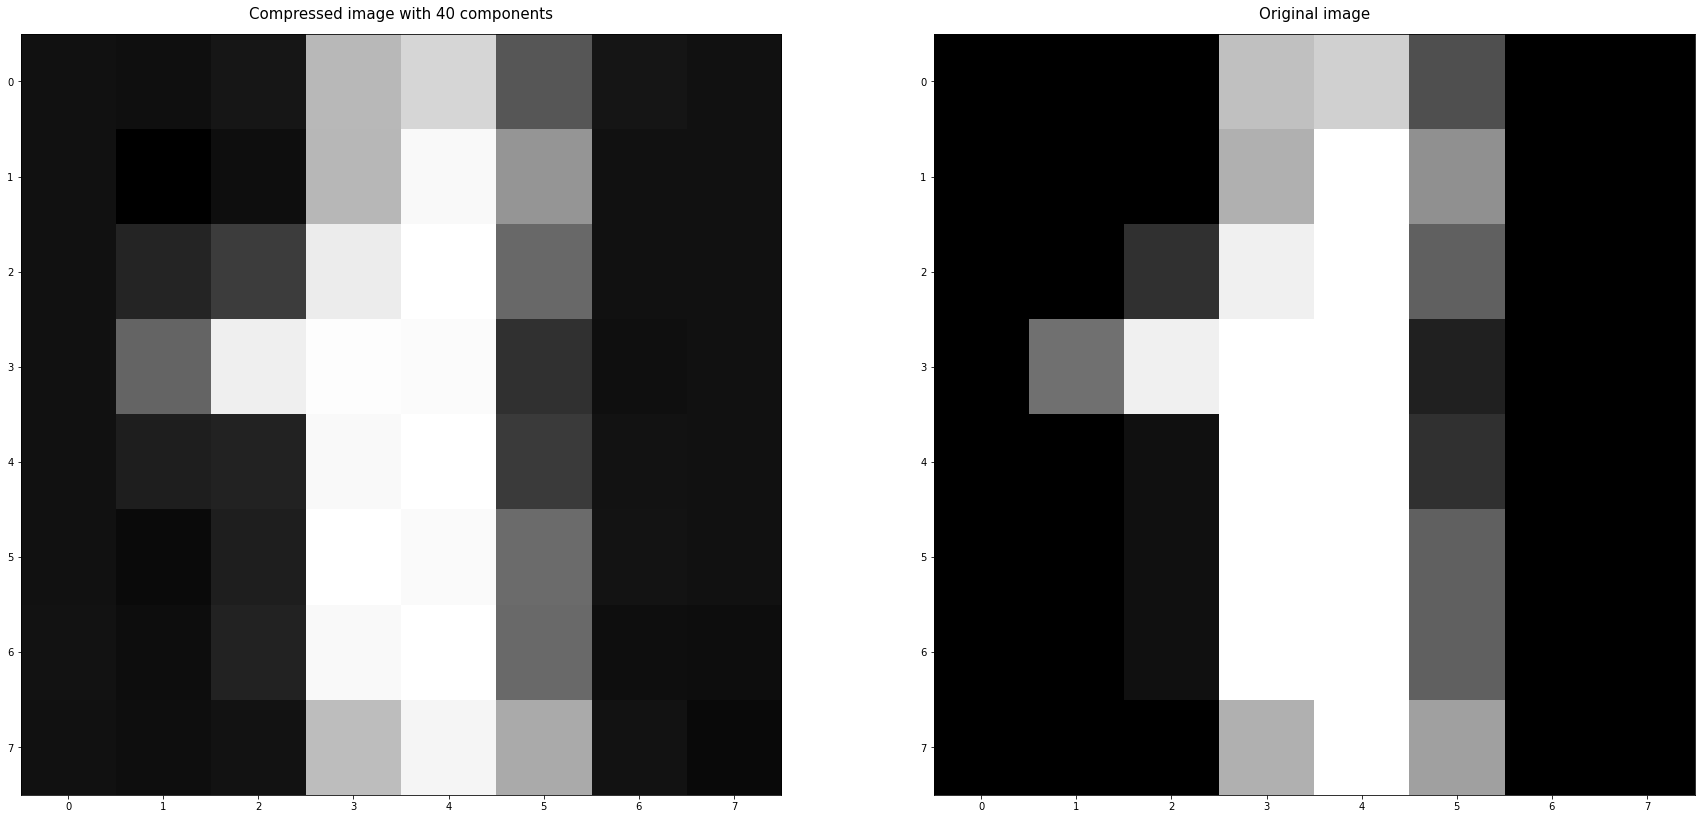

In [80]:
pca_10 = PCA(n_components=40)
mnist_pca_10_reduced = pca_10.fit_transform(X)
mnist_pca_10_recovered = pca_10.inverse_transform(mnist_pca_10_reduced)

print('Total Explained Variance in this 40 principal component : ',np.cumsum(pca_10.explained_variance_ratio_ * 100)[-1])


image_pca_10 = mnist_pca_10_recovered[1,:].reshape([8,8])
plt.figure(figsize=(30,30))
plt.subplot(1,2,1)
plt.imshow(image_pca_10, cmap='gray')
plt.title('Compressed image with 40 components', fontsize=15, pad=15)
plt.subplot(1,2,2)
plt.imshow(X.iloc[1].values.reshape(8,8), cmap='gray')
plt.title('Original image', fontsize=15, pad=15)

For Visualization

In [81]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


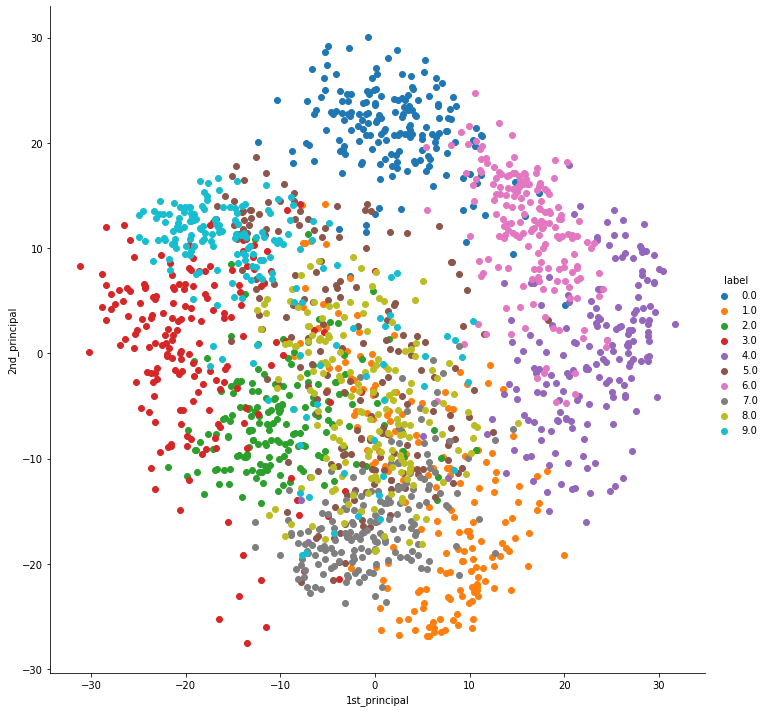

In [82]:
data_frame=pd.DataFrame(data=np.hstack((mnist_pca_10_reduced[:,[0,1]],Y)),columns=["1st_principal", "2nd_principal", "label"])
sns.FacetGrid(data_frame,hue='label',size=10).map(plt.scatter,'1st_principal','2nd_principal').add_legend()

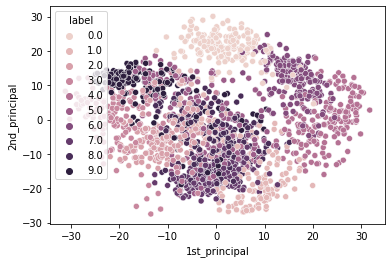

In [83]:
sns.scatterplot(x="1st_principal",y="2nd_principal",legend="full",hue="label",data=data_frame)